# __Proyecto: Optimizacion Aeroportuaria__

## Cargar datos

In [1]:
import pandas as pd

datos = pd.read_csv('flights.csv')
datos.shape

(71175, 11)

In [2]:
# primeros 5 registros
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


## Analisis basico de los datos

In [3]:
# acerca de los datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [4]:
# resumen estadisticos de las variables numericas
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [5]:
# resumen estadistico de las variables categoricas
datos.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


## Analisis visual de los datos

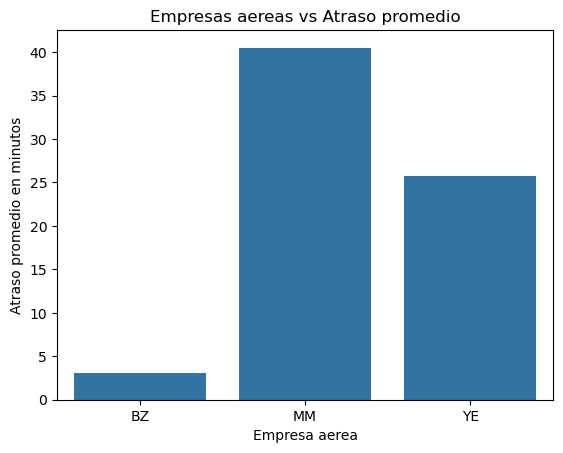

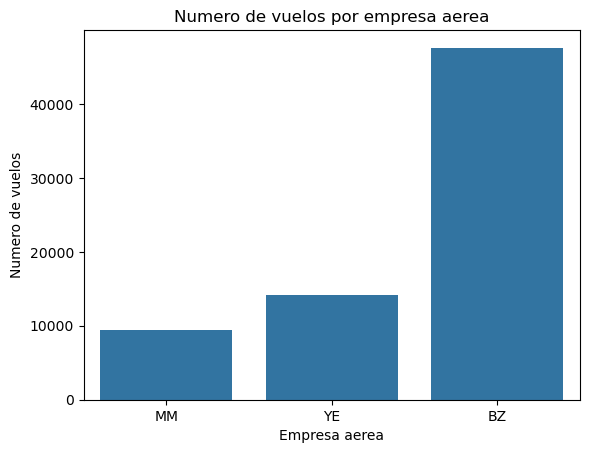

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Empresas aereas segun atraso
avg_delay = datos.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=avg_delay)
plt.title('Empresas aereas vs Atraso promedio')
plt.xlabel('Empresa aerea')
plt.ylabel('Atraso promedio en minutos')
plt.show()

# numero de vuelos por empresa aerea
sns.countplot(x='airline', data=datos)
plt.title('Numero de vuelos por empresa aerea')
plt.xlabel('Empresa aerea')
plt.ylabel('Numero de vuelos')
plt.show()

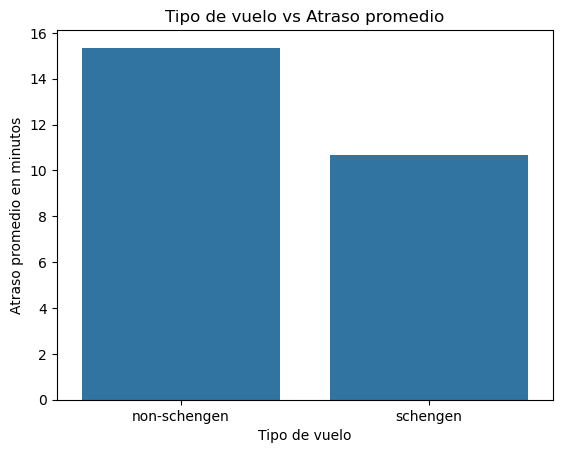

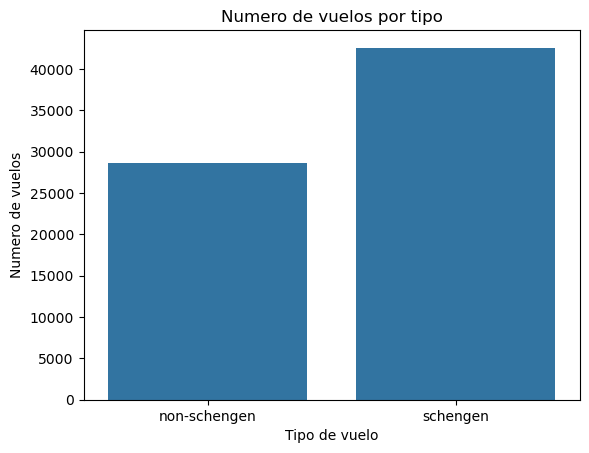

In [7]:
# tipo de vuelo segun atraso
avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=avg_delay)
plt.title('Tipo de vuelo vs Atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso promedio en minutos')
plt.show()

# numero de vuelos por tipo
sns.countplot(x='schengen', data=datos)
plt.title('Numero de vuelos por tipo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Numero de vuelos')
plt.show()

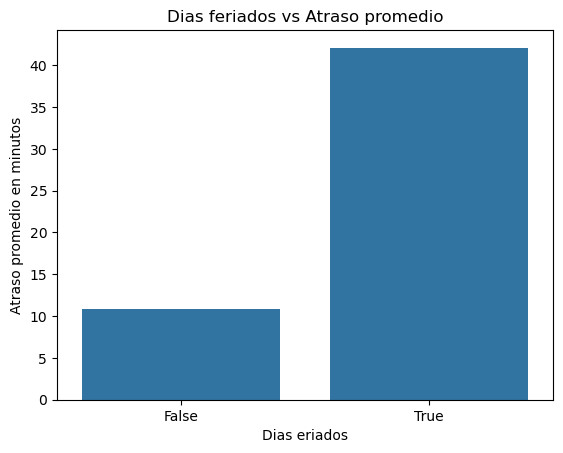

In [8]:
# atraso segun dias feriados
avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=avg_delay)
plt.title('Dias feriados vs Atraso promedio')
plt.xlabel('Dias eriados')
plt.ylabel('Atraso promedio en minutos')
plt.show()

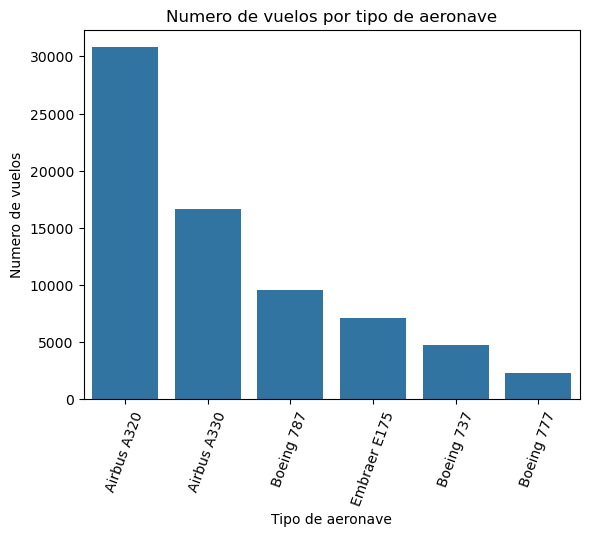

In [9]:
# obtener aeronaves en orden descendente
order = datos['aircraft_type'].value_counts().index

# numero de vuelos por tipo
sns.countplot(x='aircraft_type', data=datos, order=order)
plt.title('Numero de vuelos por tipo de aeronave')
plt.xlabel('Tipo de aeronave')
plt.ylabel('Numero de vuelos')
plt.xticks(rotation=70)
plt.show()

## Analisis de distribucion de los datos

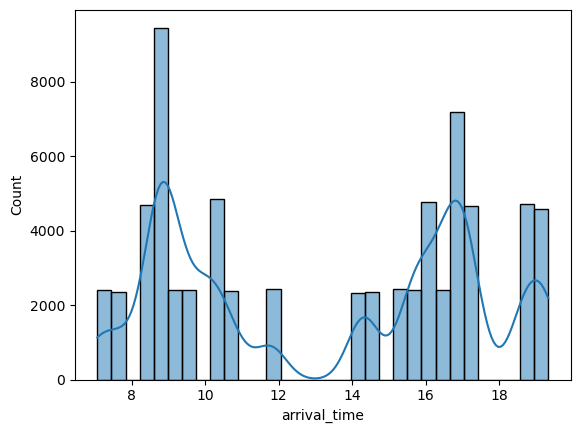

In [10]:
sns.histplot(data=datos, x='arrival_time', kde=True);

In [11]:
# definir ancho del bins con la regla Freedman
import numpy as np

def ancho_bin(df, columna):
    q75, q25 = np.percentile(df[columna], [75,25])
    iqr = q75 - q25
    ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
    return ancho

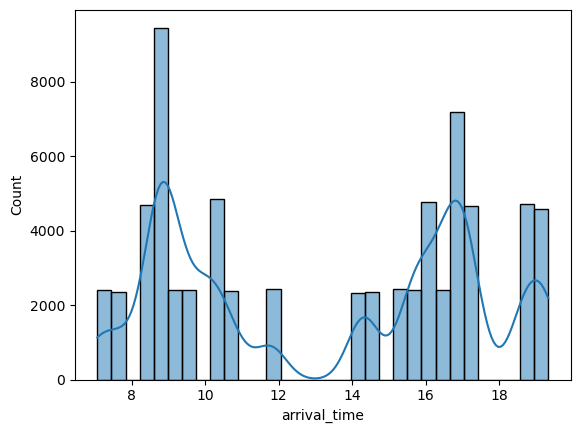

In [12]:
# histograma con los bins calculado
binwidth = ancho_bin(datos, 'arrival_time')
sns.histplot(data=datos, x='arrival_time', kde=True, binwidth=binwidth);

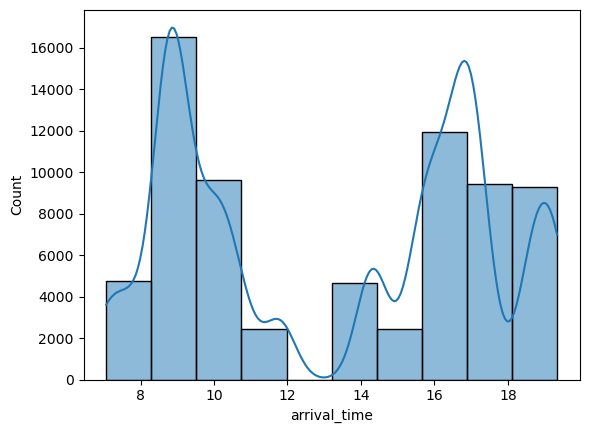

In [13]:
# histogramas con valores de bins dados manualmente
sns.histplot(data=datos, x='arrival_time', kde=True, bins=10);

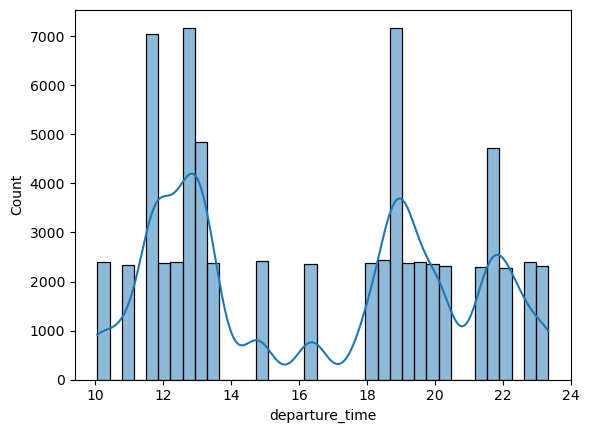

In [14]:
# histograma para el horario de salida con los bins calculado
binwidth = ancho_bin(datos, 'departure_time')
sns.histplot(data=datos, x='departure_time', kde=True, binwidth=binwidth);

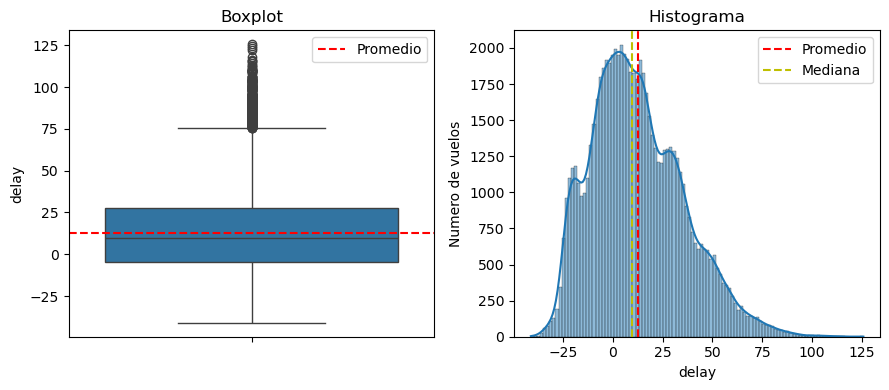

In [15]:
atraso_promedio = datos['delay'].mean()
atraso_mediana = datos['delay'].median()

fig, ax = plt.subplots(1,2,figsize=(9, 4))

sns.boxplot(data=datos, y='delay', ax=ax[0])
ax[0].set_title('Boxplot')
ax[0].axhline(y=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[0].legend()


binwidth = ancho_bin(datos, 'delay')
sns.histplot(data=datos, x='delay', ax=ax[1], kde=True, binwidth=binwidth)
plt.ylabel('Numero de vuelos')
plt.grid(False)
ax[1].set_title('Histograma')
ax[1].axvline(x=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[1].axvline(x=atraso_mediana, color='y', linestyle='--', label='Mediana')
ax[1].legend()

plt.tight_layout()
plt.show()

## Creando nuevas features

In [16]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [17]:
# crear columna fecha a partir de day y year
datos['date'] = datos['year'].astype(str) + '-' + (datos['day'] + 1).astype(str)
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-1
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-1
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-1
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-1
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-1


In [18]:
# convertimos date a tipo fecha
datos['date'] = pd.to_datetime(datos['date'], format='%Y-%j')
datos.tail(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


In [19]:
# crear columna para clasificar los dias que son fines de semana
datos['is_weekend'] = datos['date'].dt.weekday.isin([5,6])
datos['day_name'] = datos['date'].dt.day_name()
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
13772,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,188,2012,False,38.984287,2012-07-07,True,Saturday
3042,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,202,2010,False,28.966826,2010-07-22,False,Thursday
47018,8,BZ,Airbus A320,schengen,ZQO,15.729617,18.729617,214,2018,False,-1.696715,2018-08-03,False,Friday
54904,11,BZ,Airbus A320,non-schengen,EMM,10.177197,13.177197,10,2020,False,4.170458,2020-01-11,True,Saturday
10925,2,BZ,Airbus A320,schengen,ZQO,19.196804,22.196804,363,2011,False,38.281232,2011-12-30,False,Friday


## Feature encoding

In [20]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

In [21]:
# omite la visualizacion de advertencias
import warnings

warnings.filterwarnings('ignore')

In [22]:
# convertir variables bicateogricas a binarias
datos['schengen'] = datos['schengen'].replace({'non-schengen':0, 'schengen':1})
datos['is_holiday'] = datos['is_holiday'].replace({False:0, True:1})
datos['is_weekend'] = datos['is_weekend'].replace({False:0, True:1})
datos.sample(3)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
19960,4,BZ,Airbus A330,1,TCY,11.781391,14.781391,235,2013,0,-16.962536,2013-08-24,1,Saturday
22420,5,BZ,Airbus A320,1,ZQO,9.344097,12.344097,34,2014,0,38.698511,2014-02-04,0,Tuesday
67604,10,YE,Airbus A320,0,TCY,8.939996,11.939996,126,2022,0,46.092031,2022-05-07,1,Saturday


In [23]:
# convertir variables cateogricas a numericas
categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

datos_cod = pd.get_dummies(data=datos, columns=categoricas, dtype=int)
datos_cod.sample(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
63902,13,0,10.172731,13.172731,245,2021,0,-1.309350,2021-09-03,0,...,1,0,0,1,0,0,0,0,0,0
16534,28,0,15.967963,17.967963,7,2013,0,3.062427,2013-01-08,0,...,0,0,0,0,0,0,0,0,1,0
57457,10,0,8.939996,11.939996,180,2020,0,32.474259,2020-06-29,0,...,1,0,0,0,1,0,0,0,0,0
69917,5,1,9.344097,12.344097,281,2022,0,9.643911,2022-10-09,1,...,0,0,1,0,0,0,1,0,0,0
5321,9,0,10.733469,12.733469,354,2010,0,-13.004216,2010-12-21,0,...,0,1,0,0,0,0,0,0,1,0


## Limpiando los datos

Anteriormente observamos que la distribucion de los horarios de llegada como de salida son similares pero desconocemos que tan similares pueden ser. En lo que sigue vamos a analizar esta similitud

In [24]:
datos[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


> Ambas variables estan altamente correlacionadas lo que implica que si utilizamos las dos variables para el entrenamiento del modelo podriamos sesgar los resultados por lo que debemos elegir una.

In [25]:
datos_cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   71175 non-null  int64         
 1   schengen                    71175 non-null  int64         
 2   arrival_time                71175 non-null  float64       
 3   departure_time              71175 non-null  float64       
 4   day                         71175 non-null  int64         
 5   year                        71175 non-null  int64         
 6   is_holiday                  71175 non-null  int64         
 7   delay                       71175 non-null  float64       
 8   date                        71175 non-null  datetime64[ns]
 9   is_weekend                  71175 non-null  int64         
 10  airline_BZ                  71175 non-null  int64         
 11  airline_MM                  71175 non-null  int64     

In [26]:
# eliminamos variables de poco valor informativo
df = datos_cod.drop(columns=['flight_id', 'departure_time', 'day', 'year', 'date'])
df.sample(10)

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
68866,1,14.258911,0,-4.052354,1,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
51055,0,16.718722,0,29.165441,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
62729,0,16.571894,0,-14.063301,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
10914,0,16.571894,0,-6.414427,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
495,1,7.065594,0,21.026441,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
42802,0,16.571894,1,27.199837,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
65924,1,9.668655,0,26.531980,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
26939,1,18.635384,0,-10.088330,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
48062,1,11.781391,0,-15.791602,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
37462,1,9.344097,0,43.963535,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


## BaseLine

In [27]:
# importar modelo simple
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

# variables predictoras y objetivo
X = df.drop(['delay'], axis=1)
y = df['delay']

# dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# definimos y entrenamos el modelo
baseline = DummyRegressor()
baseline.fit(X_train, y_train)

DummyRegressor()

In [28]:
# evaluar el modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# obtener predicciones del modelo
y_pred_dummy = baseline.predict(X_test)

def calcular_regresion(y_test, y_pred):
    rmse = mean_squared_error(y_test, y_pred) 
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metricas = {
        'RMSE': round((rmse)**(1/2), 4), # raiz de RMSE para llevar el error a la escala de los datos
        'MAE': round(mae, 4),
        'R2': round(r2, 4)
    }

    return metricas

In [29]:
resultados_baseline = calcular_regresion(y_test, y_pred_dummy)
resultados_baseline

{'RMSE': 23.1612, 'MAE': 18.5646, 'R2': -0.0}

> El modelo no generaliza de manera correcta la variable objetivo.

## Bosque Aleatorio

In [30]:
# importar Random Forest
from sklearn.ensemble import RandomForestRegressor

# definir y entrenar el modelo
modelo = RandomForestRegressor(max_depth=5, random_state=42)
modelo.fit(X_train, y_train)

# obtener prediccion del modelo
y_pred = modelo.predict(X_test)
resultado_rf = calcular_regresion(y_test, y_pred)
resultado_rf

{'RMSE': 13.7479, 'MAE': 11.0262, 'R2': 0.6477}

> El modelo tiene una buena generalizacion (R2 = 0.64)

> RMSE y MAE son similares lo que indica un buen comportamiento del modelo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

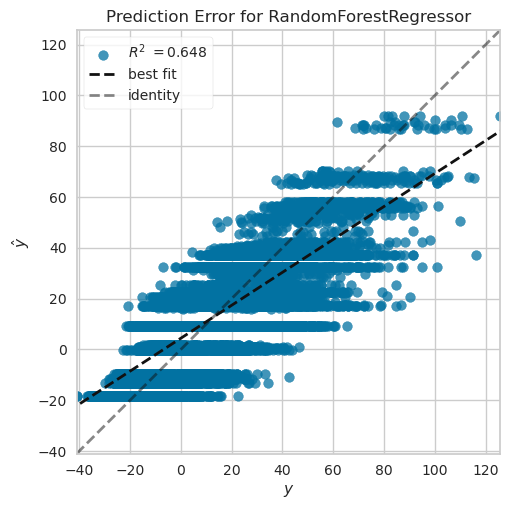

In [31]:
# visualizacion del modelo
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(modelo, X_train, y_train, X_test, y_test);

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

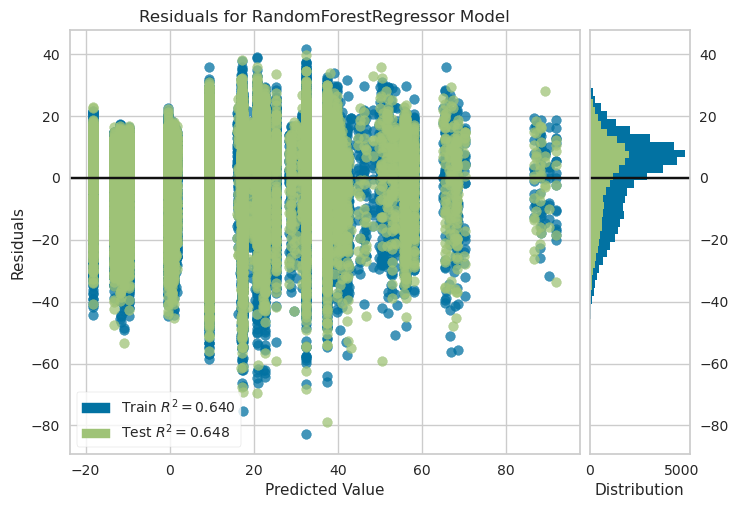

In [32]:
# visualizacion de los residuos
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(modelo, X_train, y_train, X_test, y_test);

> Lo importante en esta grafica es que la distribucion de los datos de entrenamiento y prueba sean similares

> El modelo generaliza bien pero no lo suficiente

## Validacion Cruzada

In [33]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
    'RMSE': 'neg_root_mean_squared_error',
    'MAE': 'neg_mean_absolute_error',
    'R2': 'r2'
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_result = cross_validate(modelo, X_train, y_train, scoring=scoring, cv=cv)
cv_result

{'fit_time': array([5.10388041, 3.52798223, 4.35658646, 3.43148589, 3.48414278]),
 'score_time': array([0.05780578, 0.06232476, 0.06283522, 0.06151724, 0.05965924]),
 'test_RMSE': array([-13.76989748, -13.86928373, -13.96807668, -13.85347402,
        -13.98953528]),
 'test_MAE': array([-11.03252135, -11.13534968, -11.2094657 , -11.14503717,
        -11.25775565]),
 'test_R2': array([0.64559466, 0.63745663, 0.63523823, 0.64089302, 0.63441267])}

> En estos resultados de validacion cruzada se analiza la consistencia de los resultados.

> Comparando los resultados de la CV con los dados por el modelo vemos que son similares lo que indica una buena generalizacion del modelo

## Feature importances

In [34]:
# cantidad de variables predictoras
len(df.columns)

31

> Sera que las 31 variables son importantes para el modelo? Debemos analizar y seleccionar las variables mas relevantes

In [35]:
# porcentaje de importancia para cada variable predictora
importances = modelo.feature_importances_
importances

array([3.39814918e-06, 3.60417588e-02, 1.45895991e-01, 6.10861947e-05,
       5.30319673e-01, 1.36989042e-05, 2.14417900e-05, 1.00746574e-01,
       5.76173558e-02, 5.18974843e-04, 8.83162236e-05, 2.64390542e-02,
       4.58830752e-02, 1.01922847e-04, 1.71891675e-04, 1.59736760e-02,
       3.57450957e-05, 9.21269997e-05, 5.42552087e-04, 1.03212932e-02,
       2.09099647e-02, 6.63707069e-03, 2.64070312e-04, 8.68597522e-04,
       1.00052465e-04, 2.79146627e-05, 7.17673254e-05, 3.72705034e-05,
       1.06499638e-04, 8.71862374e-05])

In [36]:
feature_importances = pd.DataFrame({'Features':X.columns, 'Importances':(importances*100).round(2)}).sort_values('Importances', ascending=False)
feature_importances

,Features,Importances
4,airline_BZ,53.03
2,is_holiday,14.59
7,aircraft_type_Airbus A320,10.07
8,aircraft_type_Airbus A330,5.76
12,aircraft_type_Embraer E175,4.59
1,arrival_time,3.60
11,aircraft_type_Boeing 787,2.64
20,origin_TCY,2.09
15,origin_CSF,1.60
19,origin_PUA,1.03


In [37]:
resultados = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])
model_features = RandomForestRegressor(max_depth=5, random_state=42)
ct_features = [i if i != 0 else 1 for i in range(0, 35, 5)]

for i in ct_features:
    selected_features = feature_importances['Features'].values[:i]
    X_train_sel = X_train[selected_features]
    X_test_sel = X_test[selected_features]
    model_features.fit(X_train_sel, y_train)
    y_pred = model_features.predict(X_test_sel)
    metricas = calcular_regresion(y_test, y_pred)
    resultados[i] = list(metricas.values())

resultados

,1,5,10,15,20,25,30
RMSE,18.8331,15.1564,13.7587,13.7497,13.7498,13.7477,13.7479
MAE,14.9620,12.0605,11.0422,11.0285,11.0280,11.0261,11.0262
R2,0.3388,0.5718,0.6471,0.6476,0.6476,0.6477,0.6477


In [38]:
resultados = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])
model_features = RandomForestRegressor(max_depth=5, random_state=42)
ct_features = range(10,16)

for i in ct_features:
    selected_features = feature_importances['Features'].values[:i]
    X_train_sel = X_train[selected_features]
    X_test_sel = X_test[selected_features]
    model_features.fit(X_train_sel, y_train)
    y_pred = model_features.predict(X_test_sel)
    metricas = calcular_regresion(y_test, y_pred)
    resultados[i] = list(metricas.values())

resultados

,10,11,12,13,14,15
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476


In [39]:
selected_features = feature_importances['Features'].values[:13]
X_selected_features = X[selected_features]
X_selected_features

,airline_BZ,is_holiday,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Embraer E175,arrival_time,aircraft_type_Boeing 787,origin_TCY,origin_CSF,origin_PUA,origin_TZF,day_name_Friday,origin_MWL
0,0,0,1,0,0,8.885071,0,1,0,0,0,1,0
1,0,0,1,0,0,8.939996,0,1,0,0,0,1,0
2,1,0,0,0,1,18.635384,0,0,0,0,1,1,0
3,1,0,0,1,0,15.967963,0,0,0,0,0,1,0
4,1,0,0,1,0,16.571894,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1,1,0,0,1,18.635384,0,0,0,0,1,0,0
71171,1,1,0,1,0,16.718722,0,0,0,0,0,0,0
71172,0,1,0,0,0,8.564949,1,0,0,0,1,0,0
71173,1,1,1,0,0,9.344097,0,0,0,0,0,0,0


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, random_state=42)

## GridSearchCV

In [43]:
# definimos parametros del modelo
param_grid = {
    'max_depth':[5,10,15],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[2,4,6],
    'n_estimators':[100,150,200]
}

In [44]:
# importamos Grid
from sklearn.model_selection import GridSearchCV

cv = KFold(n_splits=5, shuffle=True, random_state=42)
model_grid = GridSearchCV(
    RandomForestRegressor(random_state=42), 
    param_grid=param_grid,
    scoring='r2',
    cv=cv
    )

model_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [45]:
# mejor modelo
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [46]:
# evaluamos el modelo
y_pred_grid = model_grid.predict(X_test)
metricas_model_grid = calcular_regresion(y_test, y_pred_grid)
metricas_model_grid

{'RMSE': 13.2308, 'MAE': 10.6296, 'R2': 0.6754}

In [47]:
# guardamos las metricas del modelo en resultados para comparar
resultados['modelo_grid'] = list(metricas_model_grid)
resultados

,10,11,12,13,14,15,modelo_grid
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497,RMSE
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285,MAE
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476,R2


## Serializando el modelo

In [48]:
import pickle

In [49]:
with open('./champion.pkl', 'wb') as file:
    try:
        pickle.dump(model_grid.best_estimator_, file)
        print('Modelo serializado con exito')
    except Exception as e:
        print('Se presento un error al almacenar el modelo: ', str(e))

Modelo serializado con exito
